## Basic Data Exploration
----
In this interactive notebook, we will handle using the custom module `pyaqs` to fetch and clean data from the EPA's Air Quality System database, and perform a bit of exploratory analysis to see what is the most effective strategy to approach our data. In particular, we aim to do some forecasting on how levels of air pollutants can be predicted into the future, so we will focus our attention towards creating dataframes that are suitable for such analysis.

Let's start by importing our required libraries, including our custom API fetching module.

In [1]:
import pandas as pd
from pyaqs import AQSFetcher
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()

In [2]:
aqs_fetcher = AQSFetcher('bbjornstad.flatiron@gmail.com', 'ochrefox21')

Let's get a list of the state codes so that we can use them to iterate over all the states and get daily data for a particular set of parameters. Recall that in the terminology of the EPA, a parameter is a particular pollutant or measurement that can be taken of the air quality.

In [3]:
state_codes = aqs_fetcher.get_state_codes()

In [4]:
state_codes.head()

,code,state_name
0,01,Alabama
1,02,Alaska
2,04,Arizona
3,05,Arkansas
4,06,California


In a similar vein, we will also need to get a list of the possible classes of parameters that we can query the database for.

In [5]:
parameter_classes = aqs_fetcher.get_parameter_classes()

In [6]:
parameter_classes

,class_name,class_description
0,AIRNOW MAPS,The parameters represented on AirNow maps (881...
1,ALL,Select all Parameters Available
2,AQI POLLUTANTS,Pollutants that have an AQI Defined
3,CORE_HAPS,Urban Air Toxic Pollutants
4,CRITERIA,Criteria Pollutants
5,CSN DART,List of CSN speciation parameters to populate ...
6,FORECAST,Parameters routinely extracted by AirNow (STI)
7,HAPS,Hazardous Air Pollutants
8,IMPROVE CARBON,IMPROVE Carbon Parameters
9,IMPROVE_SPECIATION,PM2.5 Speciated Parameters Measured at IMPROVE...


In [7]:
aqi_pollutant_parameters = aqs_fetcher.get_parameter_list_by_class('AQI POLLUTANTS')

In [8]:
aqi_pollutant_parameters

,code,parameter_description
0,42101,Carbon monoxide
1,42401,Sulfur dioxide
2,42602,Nitrogen dioxide (NO2)
3,44201,Ozone
4,81102,PM10 Total 0-10um STP
5,88101,PM2.5 - Local Conditions
6,88502,Acceptable PM2.5 AQI & Speciation Mass


In [9]:
criteria_parameters = aqs_fetcher.get_parameter_list_by_class('CRITERIA')

In [10]:
criteria_parameters

,code,parameter_description
0,14129,Lead (TSP) LC
1,42101,Carbon monoxide
2,42401,Sulfur dioxide
3,42602,Nitrogen dioxide (NO2)
4,44201,Ozone
5,81102,PM10 Total 0-10um STP
6,85129,Lead PM10 LC FRM/FEM
7,88101,PM2.5 - Local Conditions


These seem like suitable parameters to investigate, so why don't we try fetching our data to do some basic exploration.

In [11]:
ca_state_code = state_codes.loc[state_codes.state_name == 'California'].code.values[0]
co_param_code = aqi_pollutant_parameters.loc[aqi_pollutant_parameters.parameter_description == 'Carbon monoxide'].code.values[0]

In [12]:
ca_state_code

'06'

In [13]:
co_param_code

'42101'

In [18]:
ca_daily_co_data = aqs_fetcher.daily_data_by_state(ca_state_code, [co_param_code], 20130101, 20180101)

https://aqs.epa.gov/data/api/dailyData/byState?email=bbjornstad.flatiron@gmail.com&key=ochrefox21&param=42101&state=06&bdate=20130101&edate=20180101


In [19]:
ca_daily_co_data.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,029,5002,42101,3,35.23918,-118.78863,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,130,LGR (Los GAtos Research - Off-Axis ICOS Cavity...,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,12540,"Bakersfield, CA",2019-04-23
1,06,029,5002,42101,3,35.23918,-118.78863,NAD83,Carbon monoxide,1 HOUR,...,130,LGR (Los GAtos Research - Off-Axis ICOS Cavity...,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,12540,"Bakersfield, CA",2019-04-23
2,06,029,5002,42101,3,35.23918,-118.78863,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,130,LGR (Los GAtos Research - Off-Axis ICOS Cavity...,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,12540,"Bakersfield, CA",2019-04-23
3,06,029,5002,42101,3,35.23918,-118.78863,NAD83,Carbon monoxide,1 HOUR,...,130,LGR (Los GAtos Research - Off-Axis ICOS Cavity...,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,12540,"Bakersfield, CA",2019-04-23
4,06,029,5002,42101,3,35.23918,-118.78863,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,130,LGR (Los GAtos Research - Off-Axis ICOS Cavity...,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,12540,"Bakersfield, CA",2019-04-23


In [20]:
ca_daily_co_data.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration',
       'pollutant_standard', 'date_local', 'units_of_measure', 'event_type',
       'observation_count', 'observation_percent', 'validity_indicator',
       'arithmetic_mean', 'first_max_value', 'first_max_hour', 'aqi',
       'method_code', 'method', 'local_site_name', 'site_address', 'state',
       'county', 'city', 'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [21]:
ca_co_data_trim = ca_daily_co_data.drop(
    columns=['latitude', 
             'longitude', 
             'state_code', 
             'first_max_value',
             'first_max_hour',
             'cbsa_code',
             'cbsa',
             'datum',
             'event_type',
             'method',
             'units_of_measure'])
ca_co_data_trim.head()

,county_code,site_number,parameter_code,poc,parameter,sample_duration,pollutant_standard,date_local,observation_count,observation_percent,validity_indicator,arithmetic_mean,aqi,method_code,local_site_name,site_address,state,county,city,date_of_last_change
0,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2018-01-01,19,79.0,Y,0.278947,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
1,029,5002,42101,3,Carbon monoxide,1 HOUR,CO 1-hour 1971,2018-01-01,24,100.0,Y,0.287500,NaN,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
2,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-31,24,100.0,Y,0.300000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
3,029,5002,42101,3,Carbon monoxide,1 HOUR,CO 1-hour 1971,2017-12-31,24,100.0,Y,0.275000,NaN,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
4,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-30,24,100.0,Y,0.300000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23


In [22]:
ca_co_data_trim.sample_duration.value_counts()

1 HOUR                   128519
8-HR RUN AVG END HOUR    128457
Name: sample_duration, dtype: int64

In [23]:
ca_co_data_trim = ca_co_data_trim.loc[ca_co_data_trim.sample_duration == '8-HR RUN AVG END HOUR']
ca_co_data_trim.head()

,county_code,site_number,parameter_code,poc,parameter,sample_duration,pollutant_standard,date_local,observation_count,observation_percent,validity_indicator,arithmetic_mean,aqi,method_code,local_site_name,site_address,state,county,city,date_of_last_change
0,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2018-01-01,19,79.0,Y,0.278947,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
2,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-31,24,100.0,Y,0.300000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
4,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-30,24,100.0,Y,0.300000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
6,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-29,24,100.0,Y,0.279167,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
8,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-28,24,100.0,Y,0.275000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23


In [24]:
ca_co_data_trim = ca_co_data_trim.loc[ca_co_data_trim.validity_indicator == 'Y']
ca_co_data_trim.head()

,county_code,site_number,parameter_code,poc,parameter,sample_duration,pollutant_standard,date_local,observation_count,observation_percent,validity_indicator,arithmetic_mean,aqi,method_code,local_site_name,site_address,state,county,city,date_of_last_change
0,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2018-01-01,19,79.0,Y,0.278947,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
2,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-31,24,100.0,Y,0.300000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
4,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-30,24,100.0,Y,0.300000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
6,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-29,24,100.0,Y,0.279167,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23
8,029,5002,42101,3,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2017-12-28,24,100.0,Y,0.275000,3.0,130,Arvin-Di Giorgio,"19405 BUENA VISTA BLVD, ARVIN, CA., 93203",California,Kern,Arvin,2019-04-23


In [25]:
ca_co_data_trim.shape

(122911, 20)

In [26]:
ca_co_data_trim.date_local.value_counts()

2015-06-13    76
2015-05-24    75
2015-05-25    75
2015-06-22    75
2015-05-09    75
              ..
2016-08-31    52
2015-09-01    51
2017-09-01    48
2014-01-01    48
2013-01-01    38
Name: date_local, Length: 1827, dtype: int64

In [27]:
ca_co_data_trim.date_local = pd.to_datetime(ca_co_data_trim.date_local)

For posterity's sake, let's take the daily average for our measurements in the state of California.

In [28]:
ca_co_daily_means = ca_co_data_trim.groupby('date_local').mean()

In [29]:
ca_co_daily_means.head()

,poc,observation_count,observation_percent,arithmetic_mean,aqi
date_local,,,,,
2013-01-01,1.684211,18.210526,75.842105,0.471616,10.131579
2013-01-02,1.409091,23.893939,99.575758,0.544744,9.424242
2013-01-03,1.409091,23.969697,99.878788,0.643687,10.636364
2013-01-04,1.453125,23.734375,98.890625,0.634982,10.281250
2013-01-05,1.426471,24.000000,100.000000,0.680944,11.691176


In [30]:
ca_co_daily_means.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', name='date_local', length=1827, freq=None)

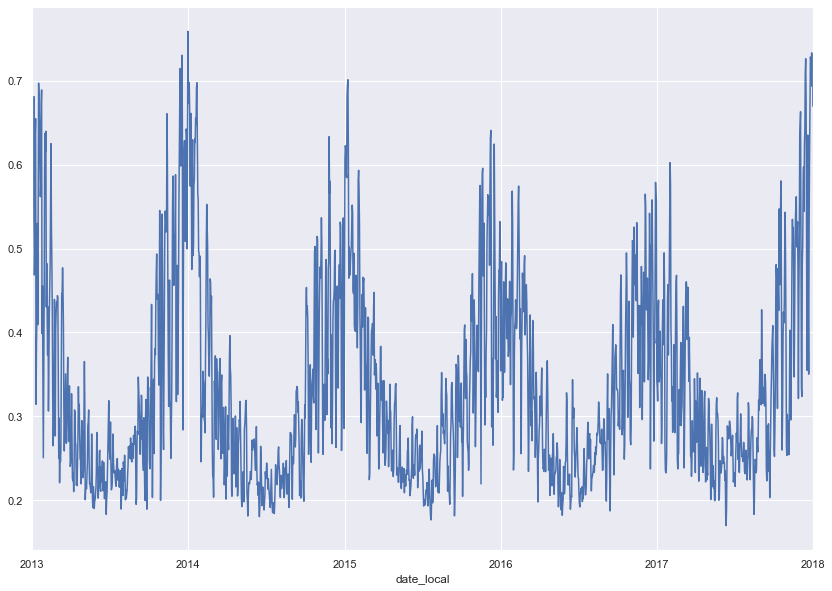

In [31]:
ca_co_daily_means.arithmetic_mean.plot(figsize=(14, 10));

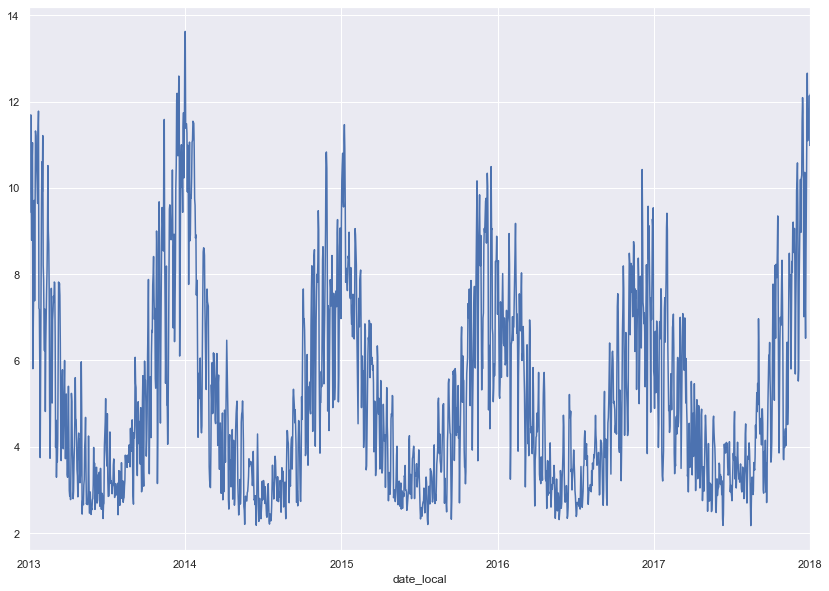

In [32]:
ca_co_daily_means.aqi.plot(figsize=(14,10));

We can clearly see seasonality to our data here! This already looks pretty good, and we have only considered the state of California so far. Let's try instead taking a look at the partial auto correlation factor to see what the exact seasonal periodicities seem to be.

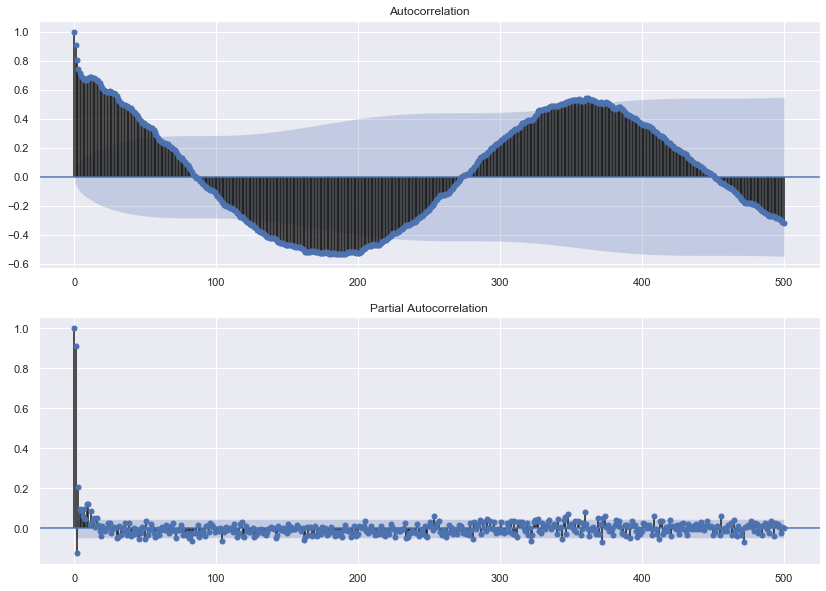

In [33]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ca_co_daily_means.aqi, lags=500, ax=ax1);
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ca_co_daily_means.aqi, lags=500, ax=ax2);

In [34]:
ca_co_daily_means.aqi.autocorr(lag=365)

0.6939725437294189

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
decompose = seasonal_decompose(ca_co_daily_means.aqi, freq=365)

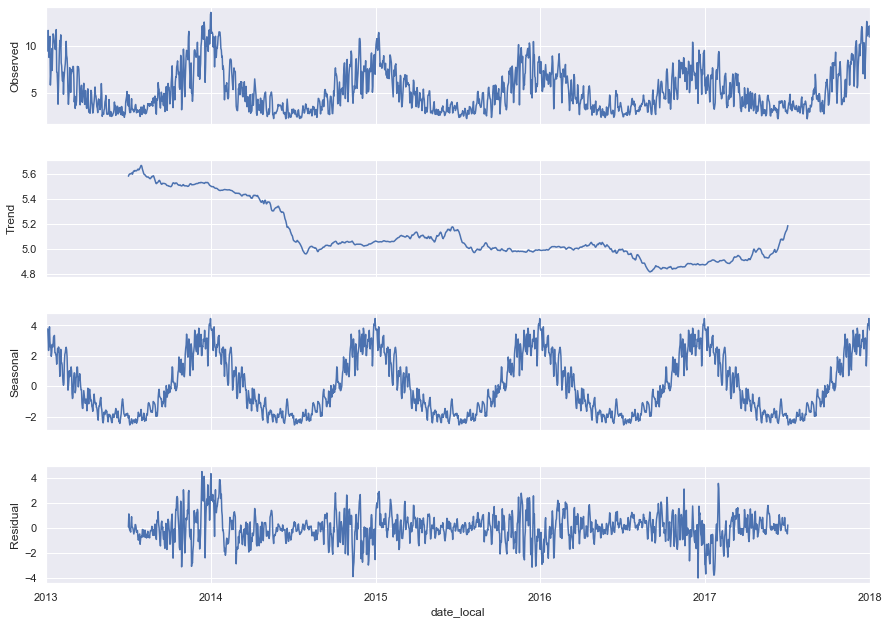

In [37]:
fig = decompose.plot()
fig.set_size_inches(14, 10)

In [43]:
decompose.resid.mean()

-0.006108752692980646

In [46]:
decompose.resid.std()

1.1069312846518122

## Let's do another state
----
What about New York?

In [48]:
ny_state_code = state_codes.loc[state_codes.state_name == 'New York'].code.values[0]

In [49]:
ny_co_daily_data = aqs_fetcher.daily_data_by_state(ny_state_code, [co_param_code], 20130101, 20180101)

https://aqs.epa.gov/data/api/dailyData/byState?email=bbjornstad.flatiron@gmail.com&key=ochrefox21&param=42101&state=36&bdate=20130101&edate=20180101


In [50]:
ny_co_daily_data.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2016-04-08
1,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2016-04-08
2,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2016-04-08
3,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2016-04-08
4,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2016-04-08


In [51]:
ny_co_data_trim = ny_co_daily_data.drop(
    columns=['latitude', 
             'longitude', 
             'state_code', 
             'first_max_value',
             'first_max_hour',
             'cbsa_code',
             'cbsa',
             'datum',
             'event_type',
             'method',
             'units_of_measure'])

In [52]:
ny_co_data_trim = ny_co_data_trim.loc[ny_co_data_trim.sample_duration == '8-HR RUN AVG END HOUR']

In [54]:
ny_co_data_trim = ny_co_data_trim.loc[ny_co_data_trim.validity_indicator == 'Y']

In [55]:
ny_co_data_trim.head()

,county_code,site_number,parameter_code,poc,parameter,sample_duration,pollutant_standard,date_local,observation_count,observation_percent,validity_indicator,arithmetic_mean,aqi,method_code,local_site_name,site_address,state,county,city,date_of_last_change
0,001,0012,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2014-12-31,24,100.0,Y,0.129167,2.0,093,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,2016-04-08
2,001,0012,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2014-12-30,24,100.0,Y,0.100000,1.0,093,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,2016-04-08
4,001,0012,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2014-12-29,24,100.0,Y,0.100000,1.0,093,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,2016-04-08
6,001,0012,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2014-12-28,24,100.0,Y,0.175000,2.0,093,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,2016-04-08
8,001,0012,42101,1,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2014-12-27,24,100.0,Y,0.312500,5.0,093,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,2016-04-08


In [56]:
ny_co_data_trim.shape

(14563, 20)

In [58]:
ny_co_data_trim.date_local = pd.to_datetime(ny_co_data_trim.date_local)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
ny_co_daily_means = ny_co_data_trim.groupby('date_local').mean()

In [60]:
ny_co_daily_means.head()

,poc,observation_count,observation_percent,arithmetic_mean,aqi
date_local,,,,,
2013-01-01,1.0,19.000000,79.000000,0.281203,3.285714
2013-01-02,1.0,23.428571,97.571429,0.298571,4.285714
2013-01-03,1.0,24.000000,100.000000,0.420000,5.600000
2013-01-04,1.0,24.000000,100.000000,0.346429,4.571429
2013-01-05,1.0,24.000000,100.000000,0.333928,4.714286


In [61]:
ny_co_daily_means.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', name='date_local', length=1827, freq=None)

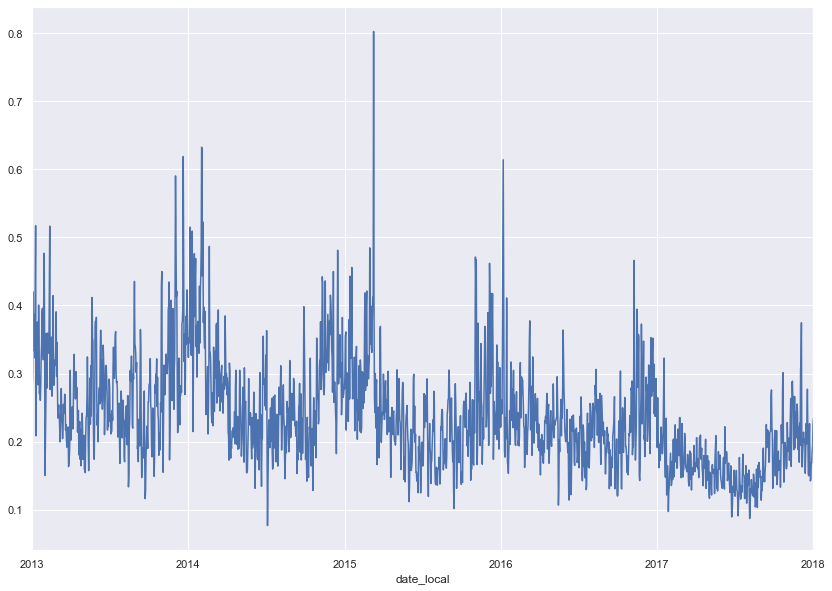

In [64]:
ny_co_daily_means.arithmetic_mean.plot(figsize=(14,10));

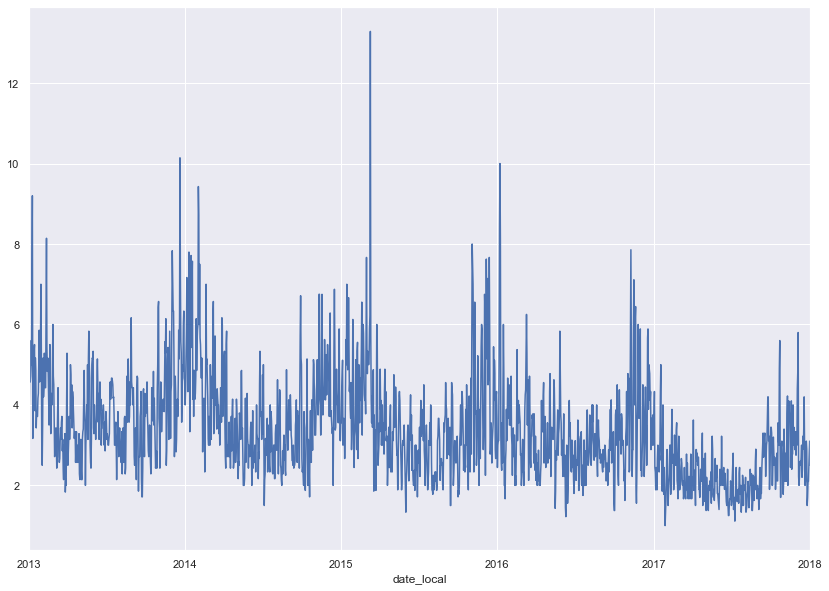

In [65]:
ny_co_daily_means.aqi.plot(figsize=(14, 10));

In [68]:
ny_decompose = seasonal_decompose(ny_co_daily_means.aqi, freq = 365)

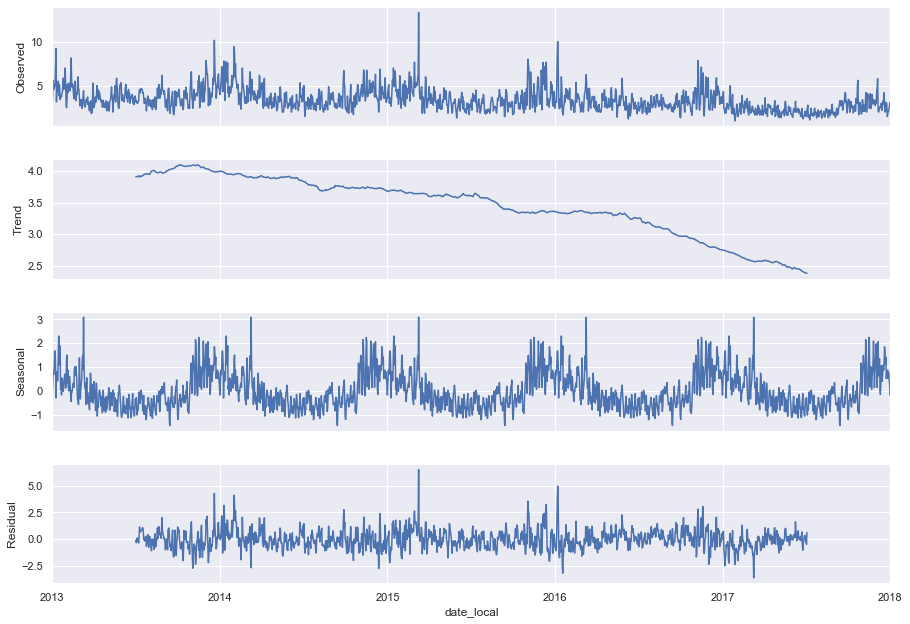

In [69]:
fig = ny_decompose.plot()
fig.set_size_inches(14,10)